<a href="https://colab.research.google.com/github/kashifalikhan36/Heart_Disease/blob/main/Heart_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_1=pd.read_csv('heart_2022_no_nans.csv')
data_2=pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
data_1.keys()

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
heart_df_1=data_1.drop(['SmokerStatus','BMI','State','GeneralHealth','MentalHealthDays','LastCheckupTime','RemovedTeeth','HadAngina','HadAsthma', 'HadSkinCancer','HadCOPD', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty','DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory','HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap'],axis=1)
heart_df_2=data_1.drop(['SmokerStatus','BMI','State','GeneralHealth','MentalHealthDays','LastCheckupTime','RemovedTeeth','HadAngina','HadAsthma', 'HadSkinCancer','HadCOPD', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty','DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory','HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap'],axis=1)

In [ ]:
heart_df = pd.merge(heart_df_1, heart_df_2, how='outer')

In [ ]:
heart_df.shape

(1423204, 13)

In [ ]:
heart_df.dtypes

,0
Sex,object
PhysicalHealthDays,float64
PhysicalActivities,object
SleepHours,float64
HadHeartAttack,object
HadStroke,object
HadDepressiveDisorder,object
HadDiabetes,object
HeightInMeters,float64
WeightInKilograms,float64


In [ ]:
Sex = pd.get_dummies(heart_df['Sex'], drop_first=True).astype(int).rename(columns={'Male': 'Gender'})
PhysicalActivities = pd.get_dummies(heart_df['PhysicalActivities'], drop_first=True).astype(int).rename(columns={'Yes': 'PhysicalActivitie'})
HadHeartAttack = pd.get_dummies(heart_df['HadHeartAttack'], drop_first=True).astype(int).rename(columns={'Yes': 'HadHeartAttacks'})
HadStroke = pd.get_dummies(heart_df['HadStroke'], drop_first=True).astype(int).rename(columns={'Yes': 'HadStrokes'})
HadDiabetes = pd.get_dummies(heart_df['HadDiabetes'], drop_first=True).astype(int).rename(columns={'Yes': 'HadDiabetess'})
HadDepressiveDisorder = pd.get_dummies(heart_df['HadDepressiveDisorder'], drop_first=True).astype(int).rename(columns={'Yes': 'HadDepressiveDisorders'})
AlcoholDrinkers = pd.get_dummies(heart_df['AlcoholDrinkers'], drop_first=True).astype(int).rename(columns={'Yes': 'AlcoholDrinker'})
HighRiskLastYear = pd.get_dummies(heart_df['HighRiskLastYear'], drop_first=True).astype(int).rename(columns={'Yes': 'HighRiskLastYears'})
CovidPos = pd.get_dummies(heart_df['CovidPos'], drop_first=True).astype(int).rename(columns={'Yes': 'CovidPosi'})


In [ ]:
# Concatenate the dummy DataFrames to the original DataFrame
heart_df = pd.concat([heart_df, Sex, PhysicalActivities, HadHeartAttack, HadStroke,
                      HadDiabetes, HadDepressiveDisorder, AlcoholDrinkers,
                      HighRiskLastYear, CovidPos], axis=1)

# Drop the original categorical columns
columns_to_drop = ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadStroke',
                   'HadDiabetes', 'HadDepressiveDisorder', 'AlcoholDrinkers',
                   'HighRiskLastYear', 'CovidPos','Tested positive using home test without a health professional','Yes, but only during pregnancy (female)','No, pre-diabetes or borderline diabetes']

heart_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
heart_df.dtypes

,0
PhysicalHealthDays,float64
SleepHours,float64
HeightInMeters,float64
WeightInKilograms,float64
Gender,int64
PhysicalActivitie,int64
HadHeartAttacks,int64
HadStrokes,int64
HadDiabetess,int64
HadDepressiveDisorders,int64


<Axes: >

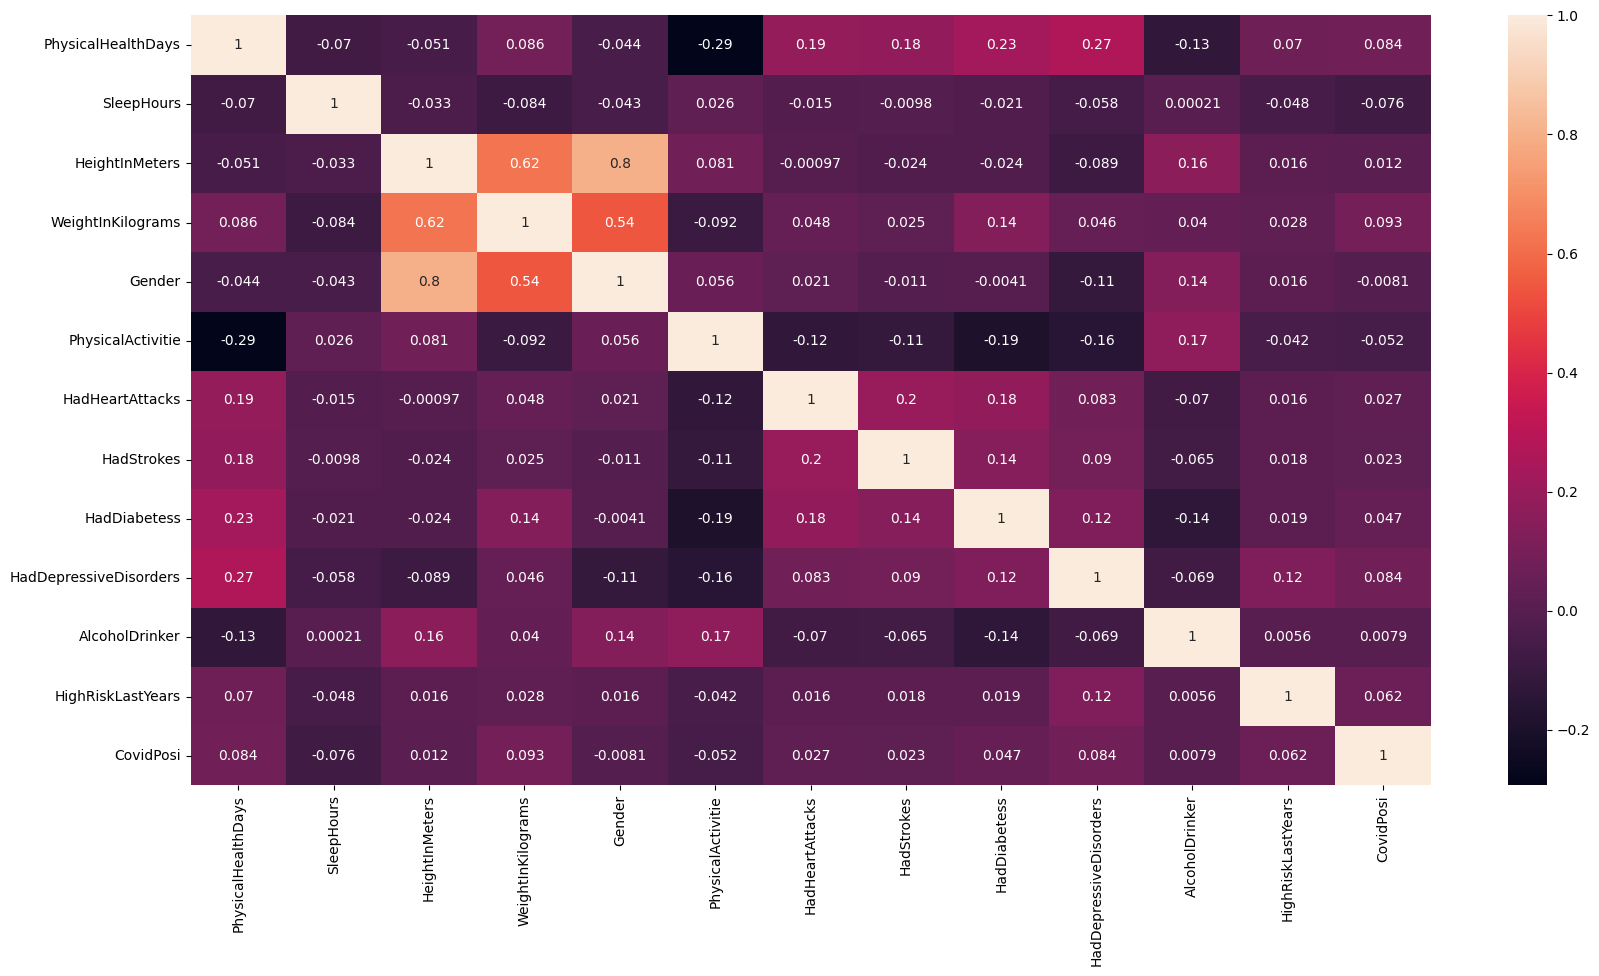

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(heart_df.corr(), annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdm=RandomForestClassifier(n_jobs=-1,max_features='sqrt')

In [ ]:
heart_df.shape

(1423204, 13)

In [ ]:
from sklearn.model_selection import train_test_split
X=heart_df.drop('HadHeartAttacks',axis=1)
y=heart_df['HadHeartAttacks']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.0175,random_state=42)

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10, 20]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rdm,param_grid=param_grid,cv=2)

In [ ]:
grid_search.fit(X_train,y_train) #taking to much time

In [ ]:
# Install RAPIDS (version 21.06) for CUDA 11.x which works with Google Colab
!pip install git+https://github.com/rapidsai/cuml.git@branch-21.06
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.ngc.nvidia.com

  Cloning https://github.com/rapidsai/cuml.git (to revision branch-21.06) to /tmp/pip-req-build-p3z2vqkw
  Running command git clone --filter=blob:none --quiet https://github.com/rapidsai/cuml.git /tmp/pip-req-build-p3z2vqkw
  Running command git checkout -b branch-21.06 --track origin/branch-21.06
  Switched to a new branch 'branch-21.06'
  Branch 'branch-21.06' set up to track remote branch 'branch-21.06' from 'origin'.
  Resolved https://github.com/rapidsai/cuml.git to commit 0bff2b842e6a31122a1d050a98e25ed1dea6aa82
ERROR: git+https://github.com/rapidsai/cuml.git@branch-21.06 does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Install RAPIDS version 23.06 (which includes cuML, cudf, and other RAPIDS libraries)
!wget -qO- https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/rapids-colab.sh | bash

PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook.  We have also created a new startup template: 
https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9?usp=sharing

CHANGES T
CELL 1:
    # This get the RAPIDS-Colab install files and test check your GPU.  Run cells 1 and 2 only.
    # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
    !python rapidsai-csp-utils/colab/env-check.py

CELL 2:
    # This will update the Colab environment and restart the kernel.
    !bash rapidsai-csp-

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 511, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 511 (delta 159), reused 124 (delta 91), pack-reused 269 (from 1)
Receiving objects: 100% (511/511), 163.95 KiB | 922.00 KiB/s, done.
Resolving deltas: 100% (261/261), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.3 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda12x 12.2.0
Uninstalling cupy-cuda12x-12.2.0:
  Successfully uninstalled cupy-cuda12x-12.2.0
restarting Colab...


In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py nightly
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

  Using cached pynvml-11.5.3-py3-none-any.whl.metadata (8.8 kB)
Using cached pynvml-11.5.3-py3-none-any.whl (53 kB)
Found existing installation: cffi 1.16.0
Uninstalling cffi-1.16.0:
  Successfully uninstalled cffi-1.16.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 10.6 MB/s eta 0:00:00
Installing RAPIDS Nightly 24.04
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.7.1               |  p

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Installing RAPIDS remaining 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached https://pypi.nvidia.com/cudf-cu12/cudf_cu12-24.4.1-cp310-cp310-manylinux_2_28_x86_64.whl (473.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cuml
from cuml.ensemble import RandomForestClassifier as cuRF
import cudf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (assuming it's a CSV and already uploaded)
data = cudf.read_csv('cleaned_heart_disease_data.csv')

# Preprocess data
X = data.drop('HadHeartAttacks', axis=1)
y = data['HadHeartAttacks']

# Convert cuDF DataFrame to CuPy arrays (since cuML uses GPU memory)
X_cupy = X.to_cupy()
y_cupy = y.to_cupy()

# Train-test split on GPU
from cuml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cupy, y_cupy, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
}

best_accuracy = 0
best_params = {}

# Manual grid search loop
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for max_features in param_grid['max_features']:
            # Initialize Random Forest with current parameters
            rf_gpu = cuRF(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=42)

            # Fit the model
            rf_gpu.fit(X_train, y_train)

            # Predictions
            y_pred = rf_gpu.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test.get(), y_pred.get())  # Convert CuPy to NumPy for accuracy calculation

            # Check for the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'max_features': max_features
                }

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

# Final predictions using the best model
rf_best = cuRF(**best_params, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_final = rf_best.predict(X_test)

# Final evaluation
print(f"Final Accuracy: {accuracy_score(y_test.get(), y_pred_final.get())}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test.get(), y_pred_final.get())}")
print(f"Classification Report:\n{classification_report(y_test.get(), y_pred_final.get())}")



/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:18

Best Parameters: {'n_estimators': 200, 'max_depth': 10, 'max_features': 'auto'}
Best Accuracy: 0.9897870994940978


/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Final Accuracy: 0.9897870994940978
Confusion Matrix:
[[281725     13]
 [  2894      8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    281738
           1       0.38      0.00      0.01      2902

    accuracy                           0.99    284640
   macro avg       0.69      0.50      0.50    284640
weighted avg       0.98      0.99      0.98    284640



In [ ]:
heart_df.to_csv('cleaned_heart_disease_data.csv', index=False)

# To download the file, use this code
from google.colab import files
files.download('cleaned_heart_disease_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Save the trained model
model_file_path = 'trained_rf_model.cuml'
cuml.save(rf_best, model_file_path)
print(f"Model saved to {model_file_path}")

AttributeError: module cuml has no attribute save

In [ ]:
import pickle
model_file_path = 'trained_rf_model_pickel.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(rf_best, model_file)  # Save the model
print(f"Model saved to {model_file_path}")

Model saved to trained_rf_model_pickel.pkl


In [ ]:
import pickle
import cudf
import cupy as cp
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the model
model_file_path = 'trained_rf_model_pickel.pkl'
with open(model_file_path, 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)

# Load your new data for prediction (assuming it's a CSV file)
new_data = cudf.read_csv('cleaned_heart_disease_data.csv')

# Preprocess new data
X_new = new_data.drop('HadHeartAttacks', axis=1)  # Ensure to drop the target column
# Convert to CuPy array for compatibility with cuML
X_new_cupy = X_new.to_cupy()

# Make predictions using the loaded model
predictions_cupy = loaded_rf_model.predict(X_new_cupy)

# Convert predictions to NumPy for further processing or evaluation
predictions = predictions_cupy.get()  # Convert CuPy array to NumPy

# If you have actual labels for the new data to evaluate the predictions
# y_new = new_data['HadHeartAttacks'].to_cupy()  # Example of actual labels if available
# accuracy = accuracy_score(y_new.get(), predictions)  # Compare predictions to actual labels
# print(f"Accuracy on new data: {accuracy}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_new.get(), predictions)}")
# print(f"Classification Report:\n{classification_report(y_new.get(), predictions)}")

# Output predictions
print("Predictions:", predictions)


Predictions: [0. 0. 0. ... 0. 0. 0.]


In [ ]:
X_new.head()

,PhysicalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Gender,PhysicalActivitie,HadStrokes,HadDiabetess,HadDepressiveDisorders,AlcoholDrinker,HighRiskLastYears,CovidPosi
0,4.0,9.0,1.60,71.67,0,1,0,0,0,0,0,0
1,0.0,6.0,1.78,95.25,1,1,0,1,0,0,0,0
2,0.0,6.0,1.78,95.25,1,1,0,1,0,0,0,0
3,0.0,6.0,1.78,95.25,1,1,0,1,0,0,0,0
4,0.0,6.0,1.78,95.25,1,1,0,1,0,0,0,0


In [ ]:
loaded_rf_model.predict(np.array([0,7,1.67,47,1,0,0,0,0,0,0,0]))

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

In [ ]:
import numpy as np
single_sample = np.array([0, 7, 1.67, 47, 1, 0, 0, 0, 0, 0, 0, 0])
single_sample_reshaped = single_sample.reshape(1, -1)
predicted_output = loaded_rf_model.predict(single_sample_reshaped)
print("Predicted Output:", predicted_output)

Predicted Output: [0.]


In [ ]:
#Best Parameters: {'n_estimators': 200, 'max_depth': 10, 'max_features': 'auto'}
#Best Accuracy: 0.9897870994940978